In [1]:
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'

In [4]:
df = pd.read_csv('main_data.csv',encoding='cp949')

In [5]:
target_df = df.copy()
target_df = target_df['target']
target_df = pd.DataFrame(target_df)

In [6]:
target_df.value_counts()

target
1         28829
0         13828
dtype: int64

In [7]:
df.drop(['long','lat','gu','gu_pop','area_store','target'],axis=1,inplace=True)

In [8]:
X_train, X_test, y_train, y_test=train_test_split(df, target_df, test_size=0.2, random_state=35,stratify=target_df)

In [9]:
X_train

,소재지면적,near_cafe,near_bus,near_bus_commute,near_bus_transfer,near_bus_many,near_subway100,near_subway600,near_subway_commute,near_subway_transfer,...,area_avgTake,area_avgCustomer,area_count,저가,고가,기타,발달상권,골목상권,기타상권,무소속
5649,7.02,5,7,2,1,0,0,1,1,0,...,7.609558e+07,5.458396e+05,1,0,0,1,0,1,0,0
1447,9.90,18,2,0,1,0,0,1,1,1,...,3.072207e+09,4.802495e+05,1,0,0,1,1,0,0,0
26640,87.23,9,2,0,2,0,0,2,0,1,...,6.712459e+07,3.059782e+05,2,0,0,1,0,1,0,0
7991,73.95,9,7,3,1,4,0,1,0,1,...,1.479911e+09,1.493485e+06,1,0,0,1,1,0,0,0
36534,20.30,12,5,5,0,5,0,0,0,0,...,8.682694e+08,3.973340e+05,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24137,52.50,11,2,1,1,0,0,1,0,0,...,3.154500e+08,9.351632e+04,1,0,0,1,0,1,0,0
40438,21.00,7,4,1,2,2,0,1,0,1,...,1.384106e+09,5.356239e+05,1,0,0,1,1,0,0,0
27428,80.50,5,5,1,0,0,0,2,2,2,...,4.109973e+08,2.269134e+05,1,0,0,1,0,1,0,0
38713,66.11,23,0,0,0,0,0,0,0,0,...,4.155123e+08,1.745636e+05,2,0,0,1,0,1,0,0


In [7]:
dt = DecisionTreeClassifier(random_state=11)
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression()
knn5 = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='rbf')

In [8]:
clf_list = [dt, rf, lr, knn5,svc]

In [9]:
def callKFold_all(clf_list):
    for clf in clf_list:
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        for iter_count, accuracy in enumerate(scores):
            print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        print("평균 정확도: {0:.4f}".format(np.mean(scores)))

In [30]:
final_result = callKFold_all(clf_list)
final_result 

교차 검증 0 정확도: 0.5785
교차 검증 1 정확도: 0.5792
교차 검증 2 정확도: 0.5638
교차 검증 3 정확도: 0.5655
교차 검증 4 정확도: 0.5676
평균 정확도: 0.5709
교차 검증 0 정확도: 0.6281
교차 검증 1 정확도: 0.6343
교차 검증 2 정확도: 0.6216
교차 검증 3 정확도: 0.6319
교차 검증 4 정확도: 0.6207
평균 정확도: 0.6273
교차 검증 0 정확도: 0.6700
교차 검증 1 정확도: 0.6681
교차 검증 2 정확도: 0.6651
교차 검증 3 정확도: 0.6663
교차 검증 4 정확도: 0.6637
평균 정확도: 0.6666
교차 검증 0 정확도: 0.6164
교차 검증 1 정확도: 0.6224
교차 검증 2 정확도: 0.6222
교차 검증 3 정확도: 0.6229
교차 검증 4 정확도: 0.6197
평균 정확도: 0.6207
교차 검증 0 정확도: 0.6721
교차 검증 1 정확도: 0.6721
교차 검증 2 정확도: 0.6721
교차 검증 3 정확도: 0.6720
교차 검증 4 정확도: 0.6721
평균 정확도: 0.6721


# GridSearchCV를 통한 RandomForestClassifier의 하이퍼 파라미터 튜닝

In [47]:
# 파라메터 후보
params = { 'n_estimators' : [60,65,70],
           'max_depth' : [10,11,12],
           'min_samples_leaf' : [7,8,9],
           'min_samples_split' : [1,2,3]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf= RandomForestClassifier(random_state = 35, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 65}
최고 예측 정확도: 0.6855


In [12]:
rf = RandomForestClassifier(n_estimators = 65, 
                                max_depth = 11,
                                min_samples_leaf = 8,
                                min_samples_split = 2,
                                random_state = 35,
                                n_jobs = -1)
rf.fit(X_train, y_train)
pred1 = rf.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred1)))

예측 정확도: 0.6846


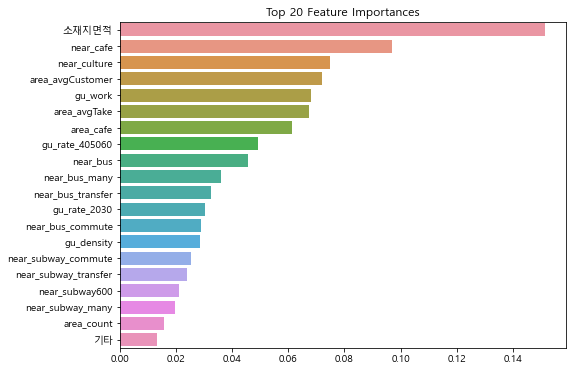

In [51]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# GridSearchCV를 통한 LogisticRegression의 하이퍼 파라미터 튜닝

In [63]:
# 파라메터 후보
params = {'C': [0.001, 0.01, 0.1, 1],
          'penalty': ['l1', 'l2','elasticnet','none']}

# 그리드 서치 진행
lr = LogisticRegression(random_state=10)
grid_cv = GridSearchCV(lr, param_grid = params, cv = 5, n_jobs = 2)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'C': 0.001, 'penalty': 'l2'}
최고 예측 정확도: 0.6706


In [13]:
lr = LogisticRegression( C=0.001, penalty='l2',random_state=35)
lr.fit(X_train, y_train)
pred2 = lr.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred2)))

예측 정확도: 0.6732


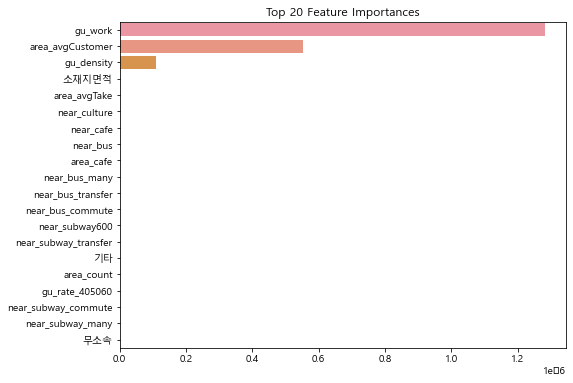

In [91]:
importance = lr.coef_[0]
importance2=abs(importance)
ftr_importances= pd.Series(importance2, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# GridSearchCV를 통한 KNeighborsClassifier의 하이퍼 파라미터 튜닝

In [33]:
params = {
    'n_neighbors' : [240,250,260],
    'weights' : ["uniform"],
    'metric' : ['manhattan']}
knn= KNeighborsClassifier()
grid_cv = GridSearchCV(knn, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'metric': 'manhattan', 'n_neighbors': 240, 'weights': 'uniform'}
최고 예측 정확도: 0.6811


In [14]:
knn = KNeighborsClassifier( n_neighbors =250, weights='uniform',metric='manhattan')
knn.fit(X_train, y_train)
pred3 = knn.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred3)))

예측 정확도: 0.6825


# GridSearchCV를 통한 SVM의 하이퍼 파라미터 튜닝

In [ ]:
params = {'C': [0.001, 0.01, 0.1],
             'gamma': [0.001] }
svc= SVC()
grid_cv = GridSearchCV(svc, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [15]:
svc = SVC( C=0.1, gamma=0.001,random_state=35)
svc.fit(X_train, y_train)
pred4 = svc.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred4)))

예측 정확도: 0.6767


In [98]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
svm = svc.SVC( C=0.1, gamma=0.001, kernel = 'linear')
svm.fit(X, Y)
f_importances(svm.coef_, features_names)

AttributeError: 'SVC' object has no attribute 'SVC'

# GridSearchCV를 통한 XGBoost의 하이퍼 파라미터 튜닝

In [44]:
params = {
        'min_child_weight': [1,2],
        'gamma': [8,9,10],
        'n_estimators':[100,150,200],
        'colsample_bytree': [0.4,0.6,0],
        'max_depth': [6,7,8]
        }
xgb= XGBClassifier(random_state=35)
grid_cv = GridSearchCV(xgb, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

[16:07:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
최적 하이퍼 파라미터:  {'colsample_bytree': 0.4, 'gamma': 9, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 200}
최고 예측 정확도: 0.6847


In [16]:
xgb = XGBClassifier(min_child_weight =1, gamma=7,max_depth=4,colsample_bytree=0.5,n_estimators=200,subsample=1,random_state=35)
xgb.fit(X_train, y_train)
pred5 = xgb.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred5)))

[19:41:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
예측 정확도: 0.6832


# GridSearchCV를 통한 LightGBM의 하이퍼 파라미터 튜닝

In [26]:
params = {
          'n_estimators':[110,120,130],
          'num_levels': [1,2,3],
          'max_depth': [1,2,3],
          'min_child_samples': [15,20,30]}
lgbm= LGBMClassifier(random_state=35)
grid_cv = GridSearchCV(lgbm, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 2, 'min_child_samples': 20, 'n_estimators': 110, 'num_levels': 1}
최고 예측 정확도: 0.6839


In [17]:
lgbm = LGBMClassifier( n_estimators=100, num_levels=2,max_depth=4 , min_child_samples=20,random_state=35)
lgbm.fit(X_train, y_train)
pred6 = lgbm.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred6)))

[LightGBM] [Warning] Unknown parameter: num_levels
예측 정확도: 0.6838


ValueError: shape mismatch: objects cannot be broadcast to a single shape

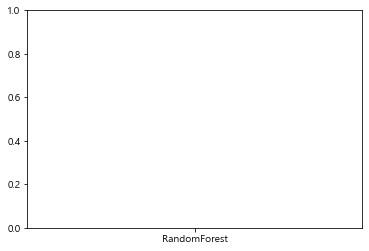

In [29]:
x=['RandomForest','LogisticRegression','KNeighbors','SVM','XGBoost','LightGBM']
y=[pred1,pred2,pred3,pred4,pred5,pred6]
plt.bar(x,y)
plt.show()

In [10]:
from sklearn.metrics import f1_score

In [11]:
pred = pipe.predict(X_test)
f1 = f1_score(y_test, pred)

NameError: name 'pipe' is not defined

In [28]:
from catboost import CatBoostClassifier

In [40]:
cb = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
cb.fit(X_train,y_train)
pred7 = cb.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred7)))

0:	learn: 0.6247254	total: 8.8ms	remaining: 8.8ms
1:	learn: 0.6217738	total: 15.8ms	remaining: 0us
예측 정확도: 0.6765


In [ ]:
params = {
    'iterations':[100,200,300,400],
    'learning_rate':[0.05,0.1,0.15],
    'depth':[4,6,8,10],
    'l2_leaf_reg':[3,6,9],
    'loss_function':['Logloss','CrossEntropy'],
    'border_count':[30,50,70]
}
cb= CatBoostClassifier(random_state=35)
grid_cv = GridSearchCV(cb, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))